In [15]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import sklearn.datasets as datasets
from torch.nn import functional as F

In [16]:
x, y = datasets.make_moons(200, noise=0.20)

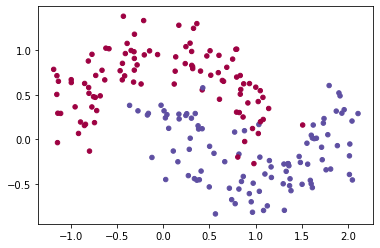

In [17]:
# Visualizing Actual Data
fig = plt.scatter(x[:,0],x[:,1], s=20, c=y, cmap=plt.cm.Spectral)

In [18]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

In [19]:
# Neural Network Model
class Model(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(Model, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)
        
    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x


In [20]:
model = Model(2, 50, 2)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)
loss_function = nn.CrossEntropyLoss()

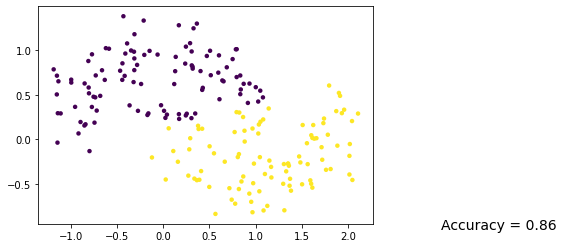

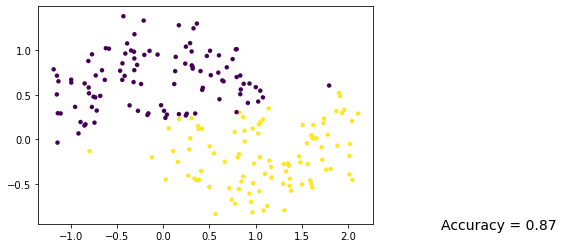

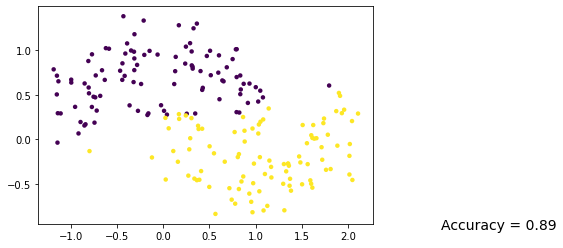

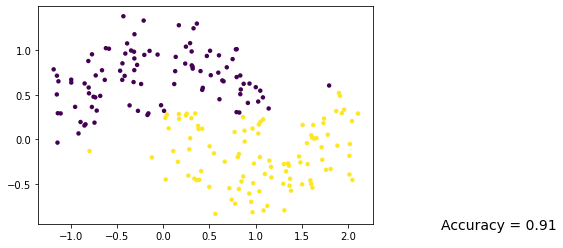

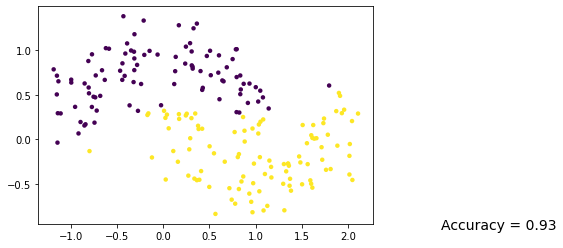

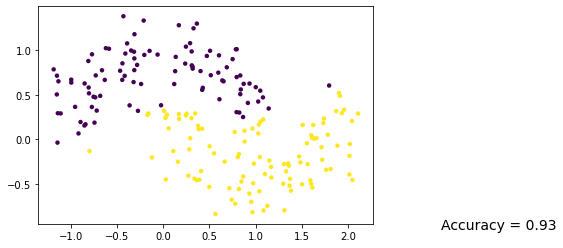

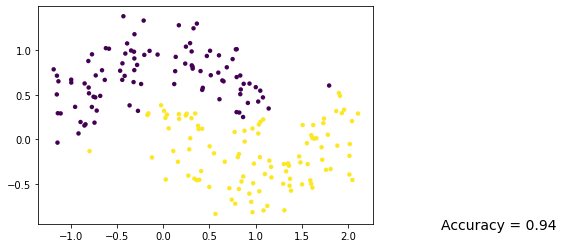

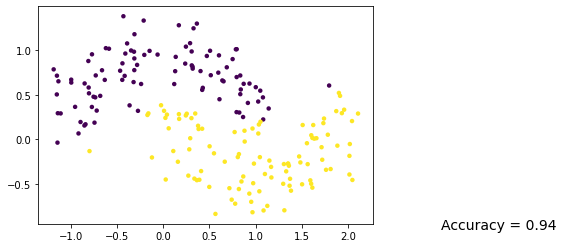

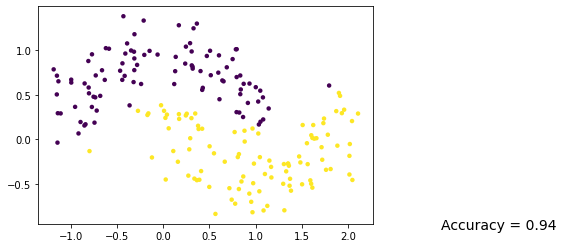

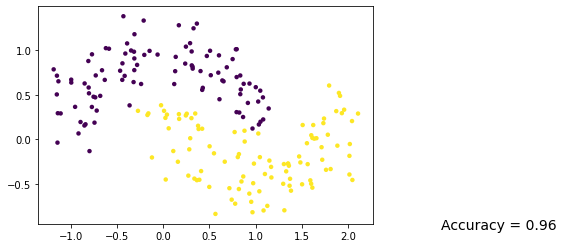

In [21]:
# Visualization of the model predictions

epochs = 1000

for epoch in range(1, epochs+1):
    out = model(x)
    
    loss = loss_function(out, y)
    
    optimizer.zero_grad() # Clear the gradients
    loss.backward() # Calculate the gradients
    optimizer.step() # make the updates in the weights
    
    # show the learning process every 100 epochs
    if epoch % 100 == 0:
        max, preds = torch.max(out, 1)
        preds_y = preds.data.numpy()
        target_y = y.data.numpy()
        
        fig = plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1], s=20, c=preds_y, lw=0)
        accuracy = (preds_y == target_y ).sum()/target_y.size
        plt.text(3, -1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)
    